In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
import scipy.sparse as sp
import scipy.sparse.linalg as spl
from scipy.linalg import cholesky
from numba import jit
from scipy import spatial
from scipy.special import sph_harm

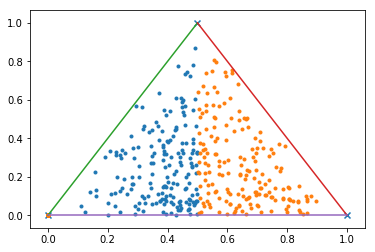

In [6]:
#triangle vertices
x=[0,1,0.5]
y=[0,0,1]
plt.scatter(x,y,marker='x')

ne=1000
cs0=gesol(np.vander(np.array(x[::-2])),np.array(y[::-2]))
xe0=np.linspace(0,0.5,ne)
ae0=np.vander(xe0,N=2)
p0=ae0@cs0

cs1=gesol(np.vander(x[1:]),y[1:])
xe1=np.linspace(0.5,1,ne)
ae1=np.vander(xe1,N=2)
p1=ae1@cs1

pt_int0 = np.zeros((ne,2))
pt_int1 = np.zeros((ne,2))
i=0
for xi,yi in zip(xe0,p0):
    ptx0 = (0.5)*np.random.random(1) + 0.0
    pty0 = (1)*np.random.random(1) + 0.0
    if ptx0 > xi and pty0 < yi:
         pt_int0[i,:]=np.array([ptx0,pty0]).flatten()
    i+=1
i=0
for xi,yi in zip(xe1,p1):
    ptx1 = (1-0.5)*np.random.random(1) + 0.5
    pty1 = (1)*np.random.random(1) + 0.0
    if ptx1 < xi and pty1 < yi:
         pt_int1[i,:]=np.array([ptx1,pty1]).flatten()
    i+=1

plt.plot((pt_int0.T)[0],(pt_int0.T)[1],'.')
plt.plot((pt_int1.T)[0],(pt_int1.T)[1],'.')
plt.plot(xe0,p0,'-')
plt.plot(xe1,p1,'-')
plt.plot(xe0*2,np.zeros(ne),'-')

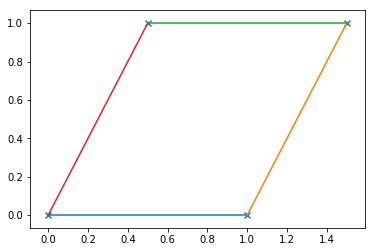

In [3]:
x=[0,1,1.5,0.5]
y=[0,0,1,1]
plt.plot(x[:2],y[:2],'-')
plt.plot(x[1:3],y[1:3],'-')
plt.plot(x[2:4],y[2:4],'-')
plt.plot(x[::-3],y[::-3],'-')
# plt.plot([1,0.5],[0,1],'-')
plt.scatter(x,y,marker='x')


## Member Functions

In [4]:
def relerr(uapprox,uexact):
    return np.linalg.norm((uapprox-uexact))/np.linalg.norm((uexact))

def abserr(uapprox,uexact):
    return np.linalg.norm((uapprox-uexact))

def cond(A):
    return np.linalg.cond(A)

def norm(M):
    return np.linalg.norm(M,2)

def inv(A):
    return np.linalg.inv(A)

def DM(pts,ctrs):
    return np.abs(np.subtract.outer(pts,ctrs))

def DM2D(x,y):
    return np.sqrt(np.abs(np.subtract.outer(x,x))**2 +\
                   np.abs(np.subtract.outer(y,y))**2)

def DM3D(x,y,z):
    return np.sqrt(np.abs(np.subtract.outer(x,x))**2 +\
                   np.abs(np.subtract.outer(y,y))**2 +\
                   np.abs(np.subtract.outer(z,z))**2)

def DM3D_eval(x,y,z,xe,ye,ze):
    return np.sqrt(abs(np.subtract.outer(xe,x))**(2)+\
                   abs(np.subtract.outer(ye,y))**(2)+\
                   abs(np.subtract.outer(ze,z))**(2))
def reshp(x):
    return x.reshape(len(x),1)

# def DM3direct(distmatrixx,distmatrixy,distmatrixz):
#     return np.sqrt(distmatrixx**2 + distmatrixy**2 +distmatrixz**2)

def gesol(lhs,rhs):
    return np.linalg.solve(lhs,rhs)
def reshp(x):
    return x.reshape(len(x),1)
def dm_nd(r,p):
    if len(r) == 1:
        x=r[0]
        return (np.abs(reshp(x)-reshp(x).T)**p)**(1.0/p)
    
    elif len(r) == 2:
        x=r[0].flatten();y=r[1].flatten()
        return (np.abs(reshp(x)-reshp(x).T)**p +\
        np.abs(reshp(y)-reshp(y).T)**p)**(1.0/p)
    
    elif len(r) == 3:
        x=r[0].flatten();y=r[1].flatten();z=r[2].flatten()
        return (np.abs(reshp(x)-reshp(x).T)**p +\
         np.abs(reshp(y)-reshp(y).T)**p +\
         np.abs(reshp(z)-reshp(z).T)**p)**(1.0/p)
    
    else:
        print("No Higher Dimensions Implemented")